## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mice = merge_df[merge_df.duplicated(['Mouse ID',])]
all_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates("Mouse ID")
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_2 = merge_df["Mouse ID"].count()
mouse_count_2


1893

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

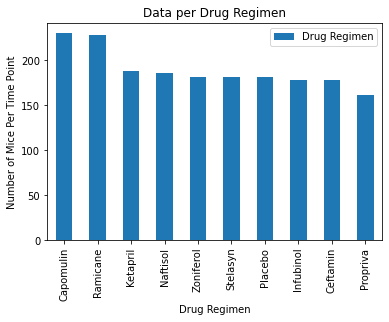

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_mice = pd.DataFrame(pd.value_counts(merge_df["Drug Regimen"]))

%matplotlib inline
# pandas plot
drugs_mice.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

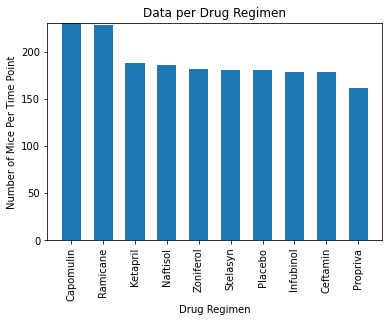

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = merge_df["Drug Regimen"].value_counts().index
y_axis = merge_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width = .6)
plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+0.4)
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()


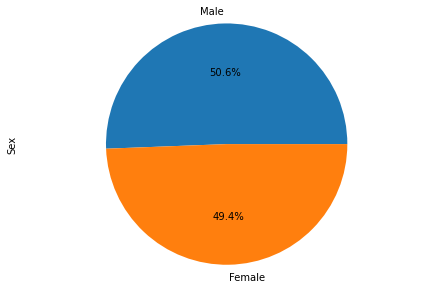

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = pd.value_counts(merge_df['Sex'])

#pandas pie plot
gender_pandas = mice_gender.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()


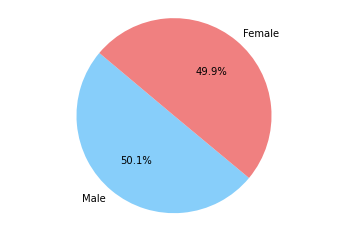

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = [325, 324]
plt.pie(
    sizes, 
    labels=["Male","Female"],          
    colors=["lightskyblue","lightcoral"],
    autopct='%1.1f%%',                                         # Formats percentages
    startangle=140
)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(merge_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge_df = pd.merge(merge_df, max_timepoint_df, on='Mouse ID')
new_merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_data = []

##Calculate the IQR and quantitatively determine if there are any potential outliers

    
    #Locate the rows which contain mice on each drug and get the tumor volumes 
    
#drug_df = merge_df.loc[merge_df['Drug Regimen'] == treatment]
    
    #add subset 
    
#final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['max_timepoint']]
    
    #create a series that lists all final tumor values
#values = final_volume_df['Tumor Volume (mm3)']
    
#tumor_vol_data.append(values)
    
    
    
    # Determine outliers using upper and lower bounds
#quartiles = values.quantile([.25, .5, .75])
#lowerq = quartiles[.25]
#upperq = quartiles[.75]
#iqr = upperq - lowerq
    
#print(f'IQR for {treatment}: {iqr}')
    
    #find upper and lower bounds to identify outliers
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
    
#print(f'Lower Bound for {treatment}: {lower_bound}')
#print(f'Upper Bound for {treatment}: {upper_bound}')
    
    #Check for ouliers
#outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                #(final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
#print(f'Number of {treatment} outliers: {outliers_count}')


Capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
Ramicane = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]
Infubinol = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
Ceftamin = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]




quartiles_Ca = x_axisCa.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca
lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)
print("Drug: Capomulin")
print(quartiles_Ca)
print(lowerq_Ca)
print(upperq_Ca)
print(iqr_Ca)
print(f"Values below {lower_bound_Ca} could be outliers.")
print(f"Values above {upper_bound_Ca} could be outliers.")

quartiles_R = x_axisR.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print("Drug: Ramicane")
print(quartiles_R)
print(lowerq_R)
print(upperq_R)
print(iqr_R)
print(f"Values below {lower_bound_R} could be outliers.")
print(f"Values above {upper_bound_R} could be outliers.")

quartiles_I = x_axisI.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I
lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print("Drug: Infubinol")
print(quartiles_I)
print(lowerq_I)
print(upperq_I)
print(iqr_I)
print(f"Values below {lower_bound_I} could be outliers.")
print(f"Values above {upper_bound_I} could be outliers.")

quartiles_Ce = x_axisCe.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print("Drug: Ceftamin")
print(quartiles_Ce)
print(lowerq_Ce)
print(upperq_Ce)
print(iqr_Ce)
print(f"Values below {lower_bound_Ce} could be outliers.")
print(f"Values above {upper_bound_Ce} could be outliers.")

Drug: Capomulin
0.25    37.685933
0.50    41.557809
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
37.685932865
45.0
7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Drug: Ramicane
0.25    36.674635
0.50    40.673236
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
36.674634585
45.0
8.325365415
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
Drug: Infubinol
0.25    47.312353
0.50    51.820584
0.75    57.314444
Name: Tumor Volume (mm3), dtype: float64
47.3123533
57.314443967500004
10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
Drug: Ceftamin
0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64
47.2084271125
56.801437570000004
9.593010457500007
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outlier

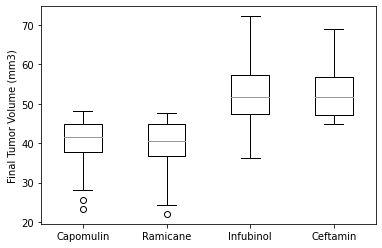

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


# Plot boxplot


# Add title and labels to boxplot

fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

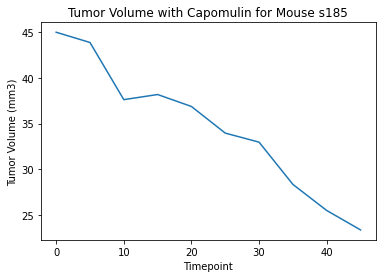

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = merge_df.loc[merge_df["Mouse ID"]== "s185"]
x_axis = x_axis["Timepoint"]

y_axis = merge_df.loc[merge_df["Mouse ID"]== "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

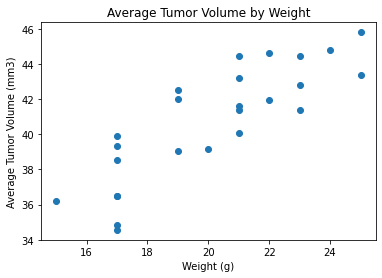

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x_data, y_data)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume for Capomulin regimen is 0.84. This implies a strong, positive relationship.


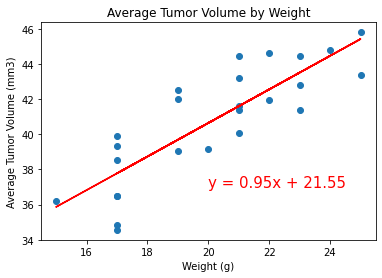

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen




capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

#calculate correlation coefficient 
correlation_coef = st.pearsonr(x_data, y_data)

# Print the answer to above calculation
print(f'The correlation between weight and average tumor volume for Capomulin regimen is {round(correlation_coef[0],2)}. This implies a strong, positive relationship.')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter and linear regression
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
